In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
city_data = pd.read_csv(city_data_to_load, low_memory=False)
ride_data = pd.read_csv(ride_data_to_load, low_memory=False)
# Read the City and Ride Data



## Bubble Plot of Ride Sharing Data

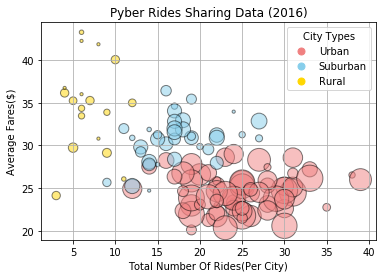

In [9]:
# Combine the data into a single dataset
combined_rides = pd.merge(ride_data,city_data,on='city',how='inner')
avgfarebycity=pd.DataFrame({'fare': combined_rides.groupby('city')["fare"].mean()})
totalridesbycity=pd.DataFrame({'ride_count': combined_rides.groupby('city')["ride_id"].count()})
citymergedrop=combined_rides.drop_duplicates(["city","driver_count","type"])
del citymergedrop["date"]
del citymergedrop["fare"]
del citymergedrop["ride_id"]
driverfaremerge=pd.merge(citymergedrop,avgfarebycity,on="city")
driverfareridesmerge=pd.merge(driverfaremerge,totalridesbycity,on="city")
driverfareridesmerge["colour"]="R"
coloursmap={"Urban":"lightcoral","Suburban":"skyblue","Rural":"gold"}
driverfareridesmerge["colour"]=driverfareridesmerge["type"].map(coloursmap)

totalrides=driverfareridesmerge["ride_count"]
avgfare=driverfareridesmerge["fare"]
drivercount=driverfareridesmerge["driver_count"]
citytype=driverfareridesmerge["type"].unique()

citytypecolour=driverfareridesmerge["colour"]

patches = [ plt.plot([],[], marker="o", ms=7, ls="",color=coloursmap[citytype[i]],
           label=citytype[i])[0]  for i in range(len(citytype)) ]

plt.legend(handles=patches,loc="best",title="City Types")


plt.scatter(x=totalrides,y=avgfare,s=drivercount*10,alpha=0.5,c=citytypecolour,edgecolor="black")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Average Fares($)")
plt.title("Pyber Rides Sharing Data (2016)")

plt.grid()
plt.savefig('bubblePyber.png')


In [10]:
# Show plot
plt.show()

## Total Fares by City Type

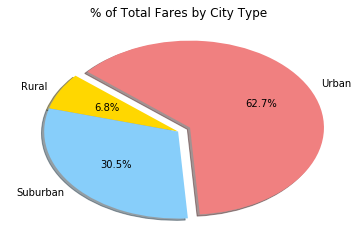

<Figure size 432x288 with 0 Axes>

In [11]:
fare_city=combined_rides.groupby(["type"])["fare"].sum()
fare_city.index
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

total_fares = combined_rides["fare"].sum()

plt.pie(fare_city, explode=explode, labels=fare_city.index, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
#plt.axis("equal")
plt.show()
# Save Figure
plt.savefig("farebycitypyber.png")
#totalridesbycity=combined_rides.groupby('type')["ride_id"].count()/combined_rides["ride_id"].count()*100
#totalridesbycity=pd.DataFrame({'total fares': combined_rides.groupby('type')["ride_id"].count()/combined_rides["ride_id"].count()}).SUM()})
#totalridesbycity
#/totalrides.sum()
plt.show()


In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

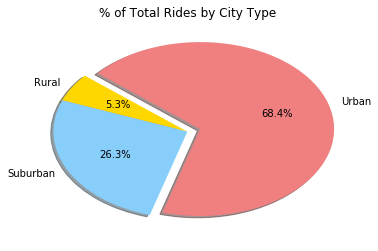

In [17]:

rides_city=combined_rides.groupby(["type"])["ride_id"].count()
rides_city.index
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)
df_for_graph=combined_rides.groupby(["type","city"],as_index=False).agg({'ride_id':'count'})
total_fares = combined_rides["fare"].sum()

plt.pie(rides_city, explode=explode, labels=rides_city.index, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")


# Calculate Ride Percents

# Build Pie Chart

# Save Figure
plt.savefig("ridesbycitypyber.png")


In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

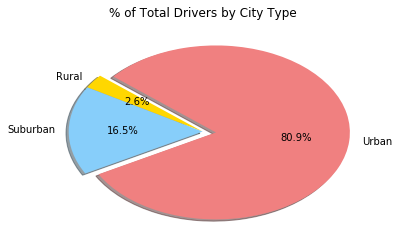

In [20]:

driver_city=city_data.groupby(["type"])["driver_count"].sum()
driver_city.index
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(driver_city, explode=explode, labels=driver_city.index, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
plt.savefig("driversbycitypyber.png")

In [16]:
# Show Figure
plt.show()